# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [71]:
# Don't modify this cell
# List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

type(cities)
new_cities = [i.capitalize() for i in cities]
#print(new_cities)
len(new_cities)

635

In [124]:
type(new_cities)

list

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
##This was to check work

# first_five = ['Albany', 'Saint Louis', 'Boston', 'Utica', 'Chicago']
# api_key = api_keys.api_key_1

# test_dict = {}
# for index, city in enumerate (first_five):
#     base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#     req = requests.get(base_url + f'&q={city}')
#     data = req.json()
#     pprint(data)
    
   
        
          
#cities is a list..    
#need to take the name of the cities and search through API using that
#is the formatting off for the names of cities?? That was a problem for stl...

In [16]:
#help(dict)

In [79]:
# OpenWeatherMap API Key
api_key = api_keys.api_key_1

# base url for getting api data
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
###why are we using base url if they ask us to use server name on the site?

# example request
#req = requests.get(base_url + f'&q={cities[0]}').json()

# Your code here. A loop maybe? 

import time

#city_weather = []
#weather_dict = {}  
new_cities = [i.capitalize() for i in cities]

city_weather = {'city':[],
                'ID':[],
                'date':[],
                'latitude': [],
                'longitude': [],
                'country':[],
                'temp_max': [],
                'humidity':[],
                'cloudiness':[],
                'wind_speed':[]}

for index, i in enumerate(new_cities) :
    #API request should be inside of for-loop
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    req = requests.get(base_url + f'&q={new_cities[index]}')
    data = req.json()
    #pprint(data)
    
    if data['cod'] == 200:
        
        city_weather["city"].append(data['name'])
        city_weather["ID"].append(data['id'])
        city_weather["date"].append(data['dt'])
        city_weather["latitude"].append(data['coord']['lat'])
        city_weather["longitude"].append(data['coord']['lon'])
        city_weather["country"].append(data['sys']['country'])
        city_weather["temp_max"].append(data['main']['temp_max'])
        city_weather["humidity"].append(data['main']['humidity'])
        city_weather["cloudiness"].append(data['clouds']['all'])
        city_weather["wind_speed"].append(data['wind']['speed'])

        pprint(city_weather)
        #prints dictionary of appended items

time.sleep(1)



#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

In [19]:
type(city_weather)

dict

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame.from_dict(city_weather)
weather_df
#type(weather_df)
#check that conversion to df was successful

#weather_df.to_csv('weather_random.csv')
#convert df into a csv file

,city,ID,date,latitude,longitude,country,temp_max,humidity,cloudiness,wind_speed
0,Ketchikan,5554428,1600799644,55.34,-131.65,US,57.20,81,90,23.04
1,Ushuaia,3833367,1600799526,-54.80,-68.30,AR,44.60,72,20,21.92
2,Atuona,4020109,1600799772,-9.80,-139.03,PF,78.71,72,100,20.94
3,Tyup,1527121,1600799772,42.73,78.36,KG,49.17,49,0,3.40
4,Mahébourg,934322,1600799772,-20.41,57.70,MU,69.80,77,40,4.70
...,...,...,...,...,...,...,...,...,...,...
538,Vestmannaeyjar,3412093,1600799907,63.44,-20.27,IS,41.00,80,40,12.75
539,Okha,2122614,1600799907,53.57,142.95,RU,42.08,76,0,7.25
540,Ruwi,287286,1600799908,23.60,58.55,OM,91.40,49,2,8.05
541,Chicama,3698359,1600799908,-7.84,-79.15,PE,74.84,52,17,11.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

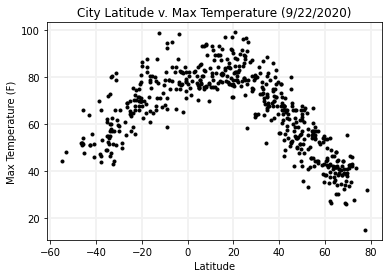

In [63]:
fig, ax =plt.subplots()
ax.plot(weather_df["latitude"], weather_df["temp_max"],marker='.', linestyle='none', color='k')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude v. Max Temperature (9/22/2020)')
plt.savefig('Lat_Temp.png', dpi=300, bbox_inches='tight')
plt.show()

#### Latitude vs. Humidity Plot

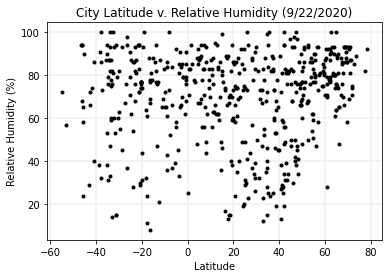

In [62]:
fig, ax =plt.subplots()
ax.plot(weather_df["latitude"], weather_df["humidity"],marker='.', linestyle='none', color='k')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Latitude')
ax.set_ylabel('Relative Humidity (%)')
ax.set_title('City Latitude v. Relative Humidity (9/22/2020)')
plt.savefig('Lat_RH.png', dpi=300, bbox_inches='tight')
plt.show()

#### Latitude vs. Cloudiness Plot

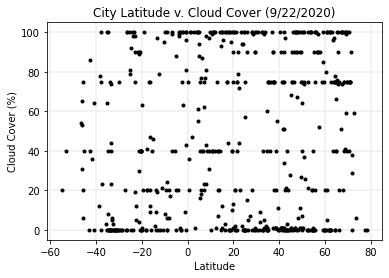

In [61]:
fig, ax =plt.subplots()
ax.plot(weather_df["latitude"], weather_df["cloudiness"],marker='.', linestyle='none', color='k')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloud Cover (%)')
ax.set_title('City Latitude v. Cloud Cover (9/22/2020)')
plt.savefig('Lat_Cloud.png', dpi=300, bbox_inches='tight')
plt.show()

#### Latitude vs. Wind Speed Plot

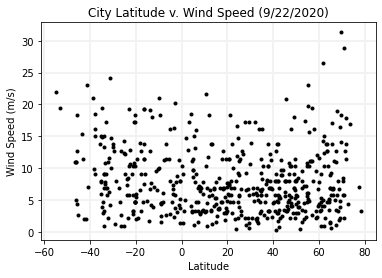

In [60]:
fig, ax =plt.subplots()
ax.plot(weather_df["latitude"], weather_df["wind_speed"],marker='.', linestyle='none', color='k')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('City Latitude v. Wind Speed (9/22/2020)')
plt.savefig('Lat_WS.png', dpi=300, bbox_inches='tight')
plt.show()

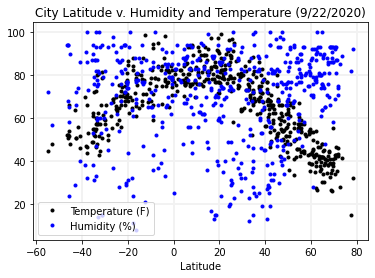

In [59]:
fig, ax =plt.subplots()
ax.plot(weather_df["latitude"], weather_df['temp_max'],marker='.', linestyle='none', color='k', label ='Temperature (F)')
ax.plot(weather_df["latitude"], weather_df["humidity"], marker='.', linestyle='none', color='b', label='Humidity (%)')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Latitude')
ax.set_title('City Latitude v. Humidity and Temperature (9/22/2020)')
ax.legend()
plt.savefig('Lat_Temp_RH.png', dpi=300, bbox_inches='tight')
plt.show()

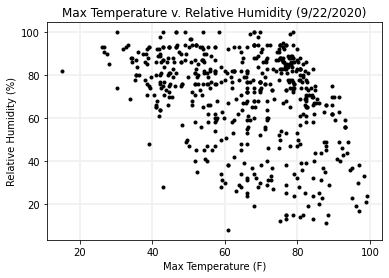

In [57]:
fig, ax =plt.subplots()
ax.plot(weather_df["temp_max"], weather_df['humidity'],marker='.', linestyle='none', color='k')
ax.grid(color='0.95', linestyle='-', linewidth=2)
ax.set_xlabel('Max Temperature (F)')
ax.set_ylabel('Relative Humidity (%)')
ax.set_title('Max Temperature v. Relative Humidity (9/22/2020)')
plt.savefig('Temp_RH.png', dpi=300, bbox_inches='tight')
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

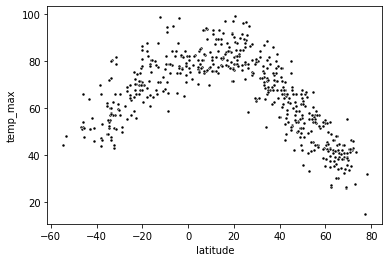

In [69]:
import seaborn as sns

sns.scatterplot(x='latitude', y='temp_max', data=weather_df, marker='.', color='k')
plt.show()

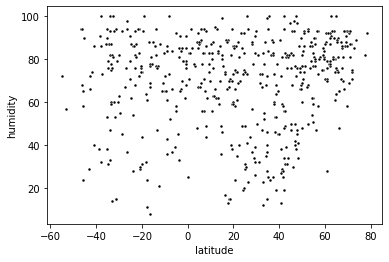

In [70]:
sns.scatterplot(x='latitude', y='humidity', data=weather_df, marker='.', color='k')
plt.show()

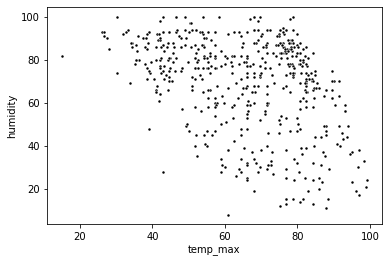

In [82]:
sns.scatterplot(x='temp_max', y='humidity', data=weather_df, marker='.', color='k')
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

### Trends
* Trend 1 : Max Temperature and Relative Humidity. As max temperature increases, the relative humidity decreases. This is not suprising, as warmer air holds less water droplets.
* Trend 2 : Max Temperature and Latitude. Cities that are closer to the equator have higher max temperatures.
* Trend 3 : Cloud cover (cloudiness) tends to be either very low or very high for these cities. I would be interested in looking at how it is collected to look into accuracy of data collection.
* Trend 4 : Maybe a slight trending towards slower windspeeds towards the equator. Very slight though

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 